In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import requests
import json
from datetime import datetime

In [2]:
# Reading the final dataset NYbike_trips_Q3.csv

filepath = '/Users/vineetasinha/Documents/workspace/NYCitiBike/CleanedBikeTrips_Q3.csv'
df_NYTrips_Q3 = pd.read_csv(filepath)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_46479/2488851254.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYTrips_Q3 = pd.read_csv(filepath)


In [3]:
df_NYTrips_Q3.shape

(4357906, 18)

In [4]:
df_NYTrips_Q3.dtypes


ride_id                object
rideable_type          object
started_at            float64
ended_at              float64
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Date                   object
AvgTemp               float64
_merge                 object
tripduration          float64
log_tripduration      float64
dtype: object

In [5]:
# Count missing values per column
missing_values_count = df_NYTrips_Q3.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
Date                     0
AvgTemp                  0
_merge                   0
tripduration             0
log_tripduration      2144
dtype: int64


In [6]:
df_cleaned = df_NYTrips_Q3.dropna(subset=['log_tripduration'])


In [7]:
# Checking again missing values per column
missing_values_count = df_cleaned.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Date                  0
AvgTemp               0
_merge                0
tripduration          0
log_tripduration      0
dtype: int64


In [8]:
# Picking theme & setting for all the plots

# Set the overall style
sns.set(style="darkgrid")

# Set the color palette
sns.set_palette("muted")



In [9]:
# Assuming df is your dataset
top_20_stations = df_cleaned['start_station_name'].value_counts().head(20)

# Convert to a DataFrame for easy plotting
top_20_stations_df = pd.DataFrame({
    'start_station_name': top_20_stations.index,
    'count': top_20_stations.values
})

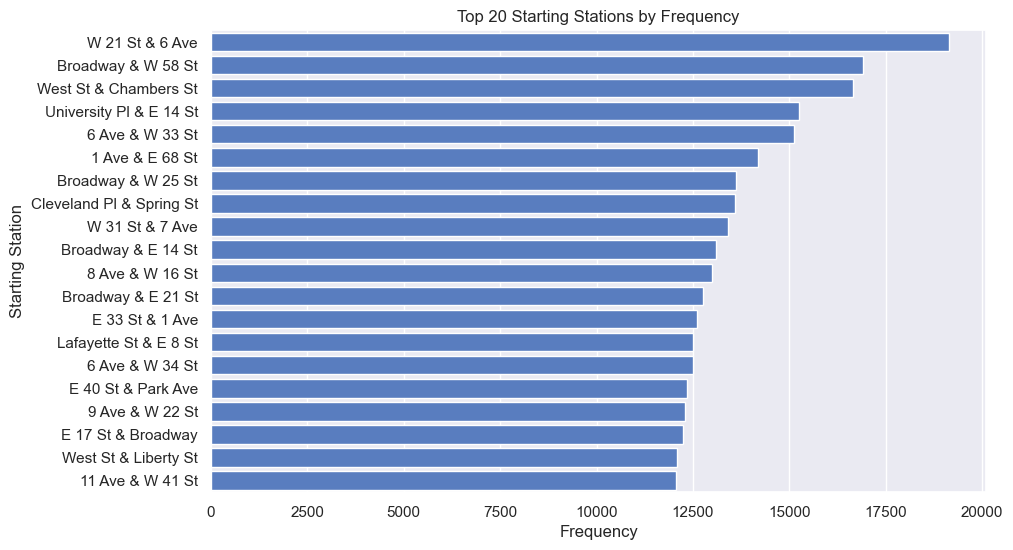

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_stations_df, x='count', y='start_station_name')
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Starting Station')
plt.show()

After plotting the chart I realized the color palette I chose in the previous step lacked color diversity and did not suit the data. After evaluating I decided to override the color palette temporarily for the specific plot in the next step.

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_46479/1201215894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')


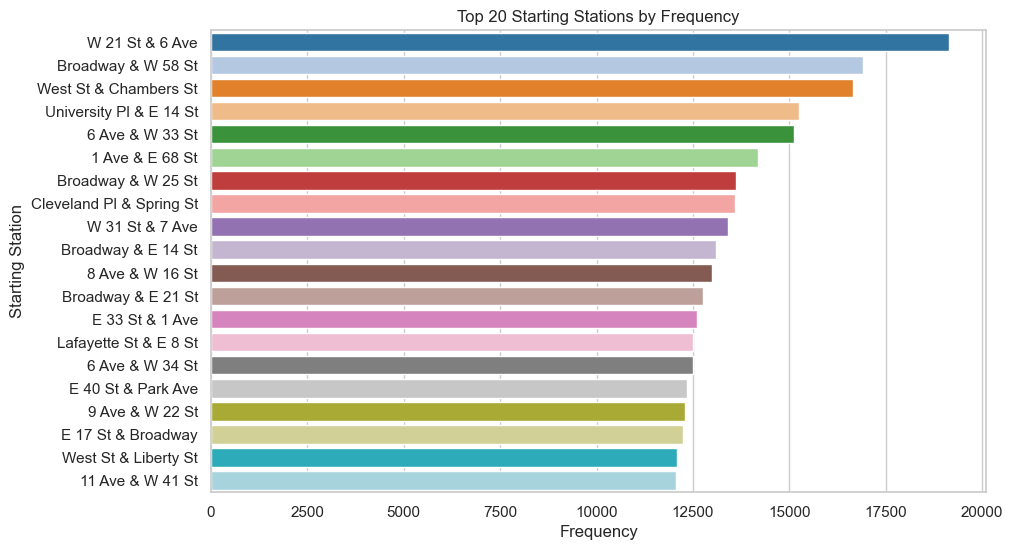

In [11]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')
    plt.title('Top 20 Starting Stations by Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Starting Station')
    plt.show()

In [12]:
daily_trips_q3 = pd.DataFrame(df_cleaned.groupby(['Date'])['ride_id'].count()).reset_index()

In [13]:
# rename a column in the daily_trips_q2 from ride_id to bike_rides_daily
daily_trips_q3.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

# merging two DataFrames (df_NYTrips_Q2 and daily_trips_q2) on a common column, 'Date', while renaming a column from daily_trips_q1 in the process. The merge is performed using an outer join, and an additional column called 'merge_indicator' is added to indicate the source of each row.
df_2022_Q3 = df_cleaned.merge(daily_trips_q3.rename(columns = {'trip_id':'bike_rides_daily'}), on = 'Date', how = 'outer', indicator = 'merge_indicator')


In [14]:
print(df_2022_Q3['_merge'].value_counts(dropna = False))


_merge
both    4355762
Name: count, dtype: int64


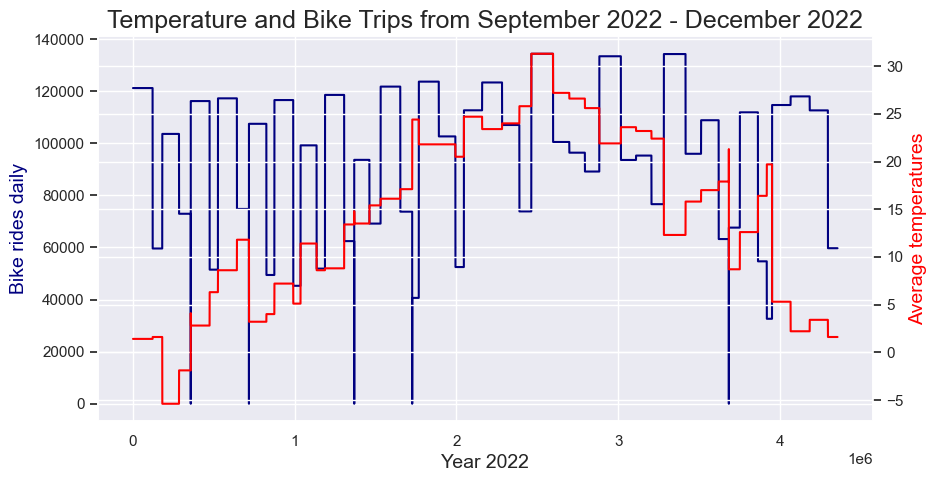

In [15]:

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of bike rides using Seaborn
sns.lineplot(data=df_2022_Q3, x=df_2022_Q3.index, y='bike_rides_daily', ax=ax, color="navy")
ax.set_xlabel("Year 2022", fontsize=14)  # Set x-axis label
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)  # Set y-axis label

# Create a second axis for the temperatures
ax2 = ax.twinx()

# Make a plot of temperatures using Seaborn on the second y-axis
sns.lineplot(data=df_2022_Q3, x=df_2022_Q3.index, y='AvgTemp', ax=ax2, color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)  # Set second y-axis label

# Set title
plt.title('Temperature and Bike Trips from September 2022 - December 2022', fontsize=18)

# Display the plot
plt.show()


Seasonal Impact (Fall to Early Winter)
---------------------------------------

September and October (Early Fall): These months typically feature mild weather, which could result in sustained or slightly declining bike usage as the weather begins to cool. The plot shows steady bike rides with only a slight decline, it suggests that the cooler but still pleasant weather continues to support biking.

November and December (Late Fall to Early Winter): As temperatures drop further, especially in December, there may be a more noticeable decline in bike trips. Cold weather, along with shorter daylight hours, often leads to a decrease in outdoor activities, including biking.

Key Takeaways
---------------
Decreased Activity in Colder Weather

The plot likely shows a decline in bike trips as the weather transitions from fall to winter. This is expected as colder temperatures and potentially inclement weather reduce the appeal of biking.

In [16]:
df_2022_Q3.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge,tripduration,bike_rides_daily,merge_indicator
0,332D1C2D012637FA,classic_bike,1.641398e+12,-9.223372e+12,W 22 St & 10 Ave,6306.06,Frederick Douglass Blvd & W 145 St,7954.12,40.746920,-74.004519,40.823061,-73.941928,casual,2022-01-05,3.2,both,-1.810795e+08,1,both
1,FEF8988CFF4B6859,classic_bike,1.641720e+12,1.670677e+12,W 56 St & 6 Ave,6809.07,Columbus Ave & W 95 St,7520.07,40.763406,-73.977225,40.791956,-73.968087,casual,2022-01-09,1.4,both,4.826116e+05,121193,both
2,6C75A60A62886538,electric_bike,1.641772e+12,1.641773e+12,38 St & Northern Blvd,6486.07,24 St & 38 Ave,6581.14,40.752415,-73.925394,40.756351,-73.936515,casual,2022-01-09,1.4,both,5.106400e+00,121193,both


In [17]:
# Check the unique values of rideable_type
print(df_2022_Q3['rideable_type'].value_counts())

# Check the range of tripduration
print(df_2022_Q3['tripduration'].describe())


rideable_type
classic_bike     2439405
electric_bike    1918501
Name: count, dtype: int64
count    4.357906e+06
mean    -7.403052e+04
std      3.670773e+06
min     -1.815710e+08
25%      5.603183e+00
50%      9.776758e+00
75%      1.724763e+01
max      4.826116e+05
Name: tripduration, dtype: float64


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_20522/2385363487.py:2: RuntimeWarning: invalid value encountered in log
  df_2022_Q3['log_tripduration'] = df_2022_Q3['tripduration'].apply(lambda x: np.log(x + 1))
/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_20522/2385363487.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2022_Q3, x='rideable_type', y='log_tripduration', palette = my_colors)


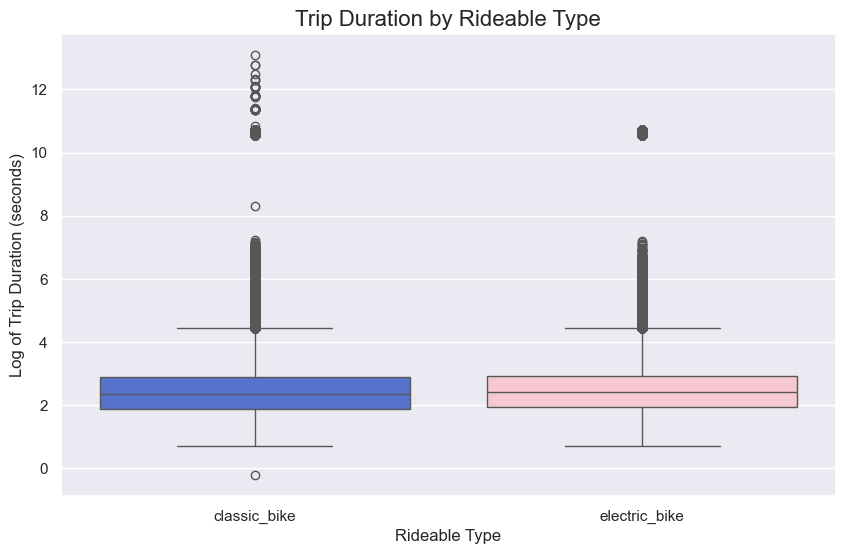

In [18]:
# Optional: If tripduration has extreme values, you can use log transformation for better visibility
df_2022_Q3['log_tripduration'] = df_2022_Q3['tripduration'].apply(lambda x: np.log(x + 1))

# Create the box plot
plt.figure(figsize=(10, 6))
my_colors = {'classic_bike': 'royalblue', 'electric_bike': 'pink'}

sns.boxplot(data=df_2022_Q3, x='rideable_type', y='log_tripduration', palette = my_colors)

# Set labels and title
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Log of Trip Duration (seconds)', fontsize=12)
plt.title('Trip Duration by Rideable Type', fontsize=16)

# Show the plot
plt.show()


Observation
------------------
Log Transformation: Applying a log transformation to tripduration can make it easier to visualize if there are extreme values. Adding 1 before logging avoids issues with zero values.

Categorical Values: Making sure rideable_type is properly categorized. The box plot should now display how trip durations vary across different bike types more clearly.

The box plot helped visualizing the distribution of trip durations for classic and electric bikes, highlighting outliers.It is quite clear that the classic bike has more outliers as compaired to electric bike

A FacetGrid can be very useful for comparing distributions and patterns across different subsets of your data. For your project, you might use FacetGrid to create multiple plots for bike trip durations, separated by bike type or user type. This would allow you to visualize and compare the distributions of trip durations across these categories side-by-side.

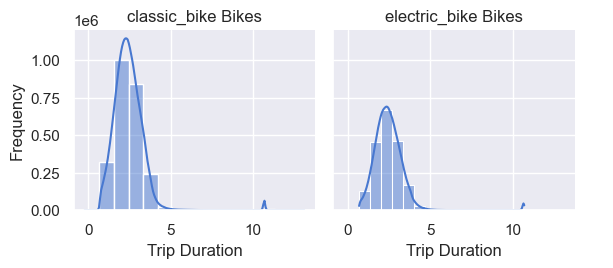

In [19]:
# Initialize a FacetGrid with 'rideable_type' as the columns
g = sns.FacetGrid(df_2022_Q3, col='rideable_type', margin_titles=True)

# Map a histogram of 'tripduration' to each subplot
g.map_dataframe(sns.histplot, x='log_tripduration', bins=15, kde=True)

# Add titles and labels
g.set_axis_labels('Trip Duration', 'Frequency')
g.set_titles(col_template="{col_name} Bikes")
g.add_legend()

plt.show()


Analysis
---------------
Distribution Comparison: The FacetGrid allows you to compare the distribution of trip durations between classic and electric bikes in a single view. For instance, if classic bikes have a wider range and more frequent long-duration trips compared to electric bikes, this could indicate differences in usage patterns or user preferences.

Identifying Patterns
-----------------------
By including the KDE (Kernel Density Estimate) in the histogram, you can observe the smooth distribution of trip durations. This helps in understanding if there are more significant peaks or clusters in one bike type over the other.

Outlier Identification
-----------------------
The histograms can help identify if one bike type has more extreme values or outliers in trip duration, providing insight into potential anomalies or unique usage patterns specific to that bike type.


Distribution Pattern Analysis
-------------------------------
The distribution patterns of trip durations across different bike types reveal key insights into how and when bikes are used. Peaks in the data highlight common trip durations, which can inform decisions on bike allocation, station placement, and maintenance schedules. Understanding these patterns allows for more efficient management of bike-sharing resources, ensuring that stations are adequately stocked and that the right types of bikes are available where and when they are most needed.

Understanding Usage Patterns
-------------------------------
The differences in distribution help inform decisions on where to place new stations or how to modify existing ones. For instance, if certain areas see frequent use of electric bikes for longer trips, it might make sense to add more electric bikes and charging stations in those locations.

Seasonal Adjustments
-------------------------
If these patterns are particularly pronounced in the fall, it could suggest a need for seasonal adjustments, such as reducing the number of bikes available during colder months when trip durations are shorter and less frequent.

In [16]:
df_2022_Q3.to_csv('/Users/vineetasinha/Documents/workspace/NYCitiBike/BikeTripsVisualizations_Q3.csv', index=False)
